In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Importing the csv file
stock_file=pd.read_csv("stockportfolio.csv")
print("CSV file of dataset:")
print(stock_file)

CSV file of dataset:
    ID   Large B/P    Large ROE    Large S/P   \
0    1        1.000        0.000        0.000   
1    2        0.000        1.000        0.000   
2    3        0.000        0.000        1.000   
3    4        0.000        0.000        0.000   
4    5        0.000        0.000        0.000   
..  ..          ...          ...          ...   
58  59        0.200        0.200        0.200   
59  60        0.200        0.200        0.000   
60  61        0.200        0.000        0.200   
61  62        0.000        0.200        0.200   
62  63        0.167        0.167        0.167   

     Large Return Rate in the last quarter    Large Market Value   \
0                                     0.000                 0.000   
1                                     0.000                 0.000   
2                                     0.000                 0.000   
3                                     1.000                 0.000   
4                                     0.000  

In [3]:
#Converting the csv file to a data frame
stock_df=pd.DataFrame(stock_file)
print("Data Frame of dataset:")
print(stock_df)

Data Frame of dataset:
    ID   Large B/P    Large ROE    Large S/P   \
0    1        1.000        0.000        0.000   
1    2        0.000        1.000        0.000   
2    3        0.000        0.000        1.000   
3    4        0.000        0.000        0.000   
4    5        0.000        0.000        0.000   
..  ..          ...          ...          ...   
58  59        0.200        0.200        0.200   
59  60        0.200        0.200        0.000   
60  61        0.200        0.000        0.200   
61  62        0.000        0.200        0.200   
62  63        0.167        0.167        0.167   

     Large Return Rate in the last quarter    Large Market Value   \
0                                     0.000                 0.000   
1                                     0.000                 0.000   
2                                     0.000                 0.000   
3                                     1.000                 0.000   
4                                     0.000

In [4]:
#Determining if there are missing variables
stock_df.isnull()

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,False,False,False,False,False,False,False,False,False,False,False,False,False
59,False,False,False,False,False,False,False,False,False,False,False,False,False
60,False,False,False,False,False,False,False,False,False,False,False,False,False
61,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
print("Summary of the dataset:")
stock_df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       63 non-null     int64  
 1    Large B/P                               63 non-null     float64
 2    Large ROE                               63 non-null     float64
 3    Large S/P                               63 non-null     float64
 4    Large Return Rate in the last quarter   63 non-null     float64
 5    Large Market Value                      63 non-null     float64
 6    Small systematic Risk                   63 non-null     float64
 7   Annual Return                            63 non-null     float64
 8   Excess Return                            63 non-null     float64
 9   Systematic Risk                          63 non-null     float64
 10  Total Risk                  

In [6]:
print("Basic statistical details:")
stock_df.describe()

Basic statistical details:


,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,32.000000,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.570698,0.563016,0.413921,0.397540,0.628571,0.536556
std,18.330303,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.112002,0.115537,0.143294,0.135762,0.104956,0.134658
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,16.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.495500,0.478500,0.303500,0.294500,0.560000,0.467000
50%,32.000000,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.580000,0.566000,0.401000,0.375000,0.560000,0.533000
75%,47.500000,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.655500,0.645000,0.496500,0.459500,0.680000,0.667000
max,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


In [7]:
print("Sorting according to desending order of 'Annual Return'")
print(stock_df.sort_values(by=['Annual Return'],ascending=False))

Sorting according to desending order of 'Annual Return'
    ID   Large B/P    Large ROE    Large S/P   \
11  12        0.000        0.000        0.500   
41  42        0.250        0.250        0.250   
24  25        0.000        0.333        0.333   
56  57        0.200        0.200        0.200   
2    3        0.000        0.000        1.000   
..  ..          ...          ...          ...   
19  20        0.000        0.000        0.000   
32  33        0.333        0.000        0.333   
3    4        0.000        0.000        0.000   
16  17        0.500        0.000        0.000   
5    6        0.000        0.000        0.000   

     Large Return Rate in the last quarter    Large Market Value   \
11                                    0.500                   0.0   
41                                    0.250                   0.0   
24                                    0.333                   0.0   
56                                    0.200                   0.2   
2         

In [8]:
print("Sorting according to desending order of 'Excess Return'")
print(stock_df.sort_values(by=['Excess Return'],ascending=False))

Sorting according to desending order of 'Excess Return'
    ID   Large B/P    Large ROE    Large S/P   \
2    3        0.000        0.000        1.000   
11  12        0.000        0.000        0.500   
41  42        0.250        0.250        0.250   
7    8        0.500        0.000        0.500   
21  22        0.333        0.333        0.333   
..  ..          ...          ...          ...   
20  21        0.000        0.000        0.000   
17  18        0.000        0.500        0.000   
19  20        0.000        0.000        0.000   
16  17        0.500        0.000        0.000   
5    6        0.000        0.000        0.000   

     Large Return Rate in the last quarter    Large Market Value   \
2                                      0.00                   0.0   
11                                     0.50                   0.0   
41                                     0.25                   0.0   
7                                      0.00                   0.0   
21        

In [9]:
#Input variables: x=["Large B/P","Large ROE","Large S/P","Large Return Rate in the last quarter","Large Market","Small systematic Risk"]
#Outpt variables: y=["Annual Return","Excess Return","Systematic Risk","Total Risk","Abs. Win Rate","Rel. Win Rate"]

x=stock_df.iloc[:,1:7]
y=stock_df.iloc[:,7:13]

print("Input variables (x):\n", x)
print("Output variables (y):\n",y)

Input variables (x):
      Large B/P    Large ROE    Large S/P   \
0         1.000        0.000        0.000   
1         0.000        1.000        0.000   
2         0.000        0.000        1.000   
3         0.000        0.000        0.000   
4         0.000        0.000        0.000   
..          ...          ...          ...   
58        0.200        0.200        0.200   
59        0.200        0.200        0.000   
60        0.200        0.000        0.200   
61        0.000        0.200        0.200   
62        0.167        0.167        0.167   

     Large Return Rate in the last quarter    Large Market Value   \
0                                     0.000                 0.000   
1                                     0.000                 0.000   
2                                     0.000                 0.000   
3                                     1.000                 0.000   
4                                     0.000                 1.000   
..                     

In [10]:
#Covariance of input variables
x_covar=x.cov()
print("Covarriance of x:")
x.cov()

Covarriance of x:


,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
Large B/P,0.039722,-0.007944,-0.007944,-0.007944,-0.007944,-0.007944
Large ROE,-0.007944,0.039722,-0.007944,-0.007944,-0.007944,-0.007944
Large S/P,-0.007944,-0.007944,0.039722,-0.007944,-0.007944,-0.007944
Large Return Rate in the last quarter,-0.007944,-0.007944,-0.007944,0.039722,-0.007944,-0.007944
Large Market Value,-0.007944,-0.007944,-0.007944,-0.007944,0.039722,-0.007944
Small systematic Risk,-0.007944,-0.007944,-0.007944,-0.007944,-0.007944,0.039722


In [11]:
#Covariance of output variables
y_covar=x.cov()
print("Covarriance of y:")
y.cov()

Covarriance of y:


,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
Annual Return,0.012544,0.012539,0.009598,0.008126,0.000644,0.006312
Excess Return,0.012539,0.013349,0.012677,0.011287,0.000547,0.004865
Systematic Risk,0.009598,0.012677,0.020533,0.019313,-0.001243,-0.000879
Total Risk,0.008126,0.011287,0.019313,0.018431,-0.000833,-0.001897
Abs. Win Rate,0.000644,0.000547,-0.001243,-0.000833,0.011016,0.002745
Rel. Win Rate,0.006312,0.004865,-0.000879,-0.001897,0.002745,0.018133


In [12]:
#Correlation of input variables
x_corr=x.corr()
print("Correlation of x:")
x.corr()

Correlation of x:


,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
Large B/P,1.0,-0.2,-0.2,-0.2,-0.2,-0.2
Large ROE,-0.2,1.0,-0.2,-0.2,-0.2,-0.2
Large S/P,-0.2,-0.2,1.0,-0.2,-0.2,-0.2
Large Return Rate in the last quarter,-0.2,-0.2,-0.2,1.0,-0.2,-0.2
Large Market Value,-0.2,-0.2,-0.2,-0.2,1.0,-0.2
Small systematic Risk,-0.2,-0.2,-0.2,-0.2,-0.2,1.0


In [13]:
#Correlation of output variables
y_corr=(y.corr())
print("Correlation of y:")
y.corr()

Correlation of y:


,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
Annual Return,1.000000,0.968955,0.598018,0.534405,0.054805,0.418509
Excess Return,0.968955,1.000000,0.765733,0.719605,0.045079,0.312707
Systematic Risk,0.598018,0.765733,1.000000,0.992742,-0.082640,-0.045552
Total Risk,0.534405,0.719605,0.992742,1.000000,-0.058467,-0.103771
Abs. Win Rate,0.054805,0.045079,-0.082640,-0.058467,1.000000,0.194190
Rel. Win Rate,0.418509,0.312707,-0.045552,-0.103771,0.194190,1.000000


In [14]:
#Dividing the dataset into training(75%) and testing(25%) sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,train_size=0.75,random_state=42)

In [15]:
#Linear Regression model 1

model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error of random state 42: {mse}")

Mean Squared Error of random state 42: 0.009242098597065236


In [16]:
#Linear Regression model to find the least mean square error

tempmse=1
tempi=0
for i in range (100):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,train_size=0.75,random_state=i)
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    if (tempmse>mse):
        tempmse=mse
        tempi=i
print(f"Mean Squared Error is least in random state {tempi}\nMSE: {mse}")

Mean Squared Error is least in random state 12
MSE: 0.0057626682353770055


In [17]:
rmse = (mse ** 0.5)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R^2) Score: {r2}")

Root Mean Squared Error: 0.07591224035277187
R-squared (R^2) Score: 0.49222637075812753


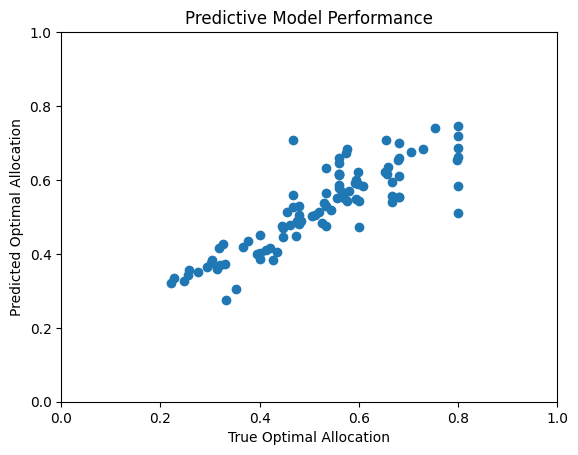

In [18]:
#Scatterplot graph of testing vs predictive output of regression model

plt.scatter(y_test, y_pred)
plt.title('Predictive Model Performance')
plt.xlabel('True Optimal Allocation')
plt.ylabel('Predicted Optimal Allocation')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [19]:
print("Coefficients:", model.coef_)
print("Intercepts:", model.intercept_)

Coefficients: [[  3.91076922   3.94272011   4.12718817   3.92277472   3.86156366
    3.54053201]
 [  2.41480362   2.35505576   2.59481876   2.37086861   2.27497955
    1.96240975]
 [ -5.52600768  -5.88529292  -5.52525254  -5.72600149  -5.9292564
   -6.16902123]
 [ -5.81078874  -6.18439482  -5.83821651  -6.005805    -6.22487753
   -6.40908042]
 [-25.21194734 -25.131603   -25.24794748 -25.11476969 -24.99945943
  -25.33351707]
 [ 51.98238355  52.26771902  52.19480521  51.90590161  52.28120794
   51.85013264]]
Intercepts: [ -3.31071475  -1.76299113   6.21090673   6.47878361  25.78419943
 -51.52959845]


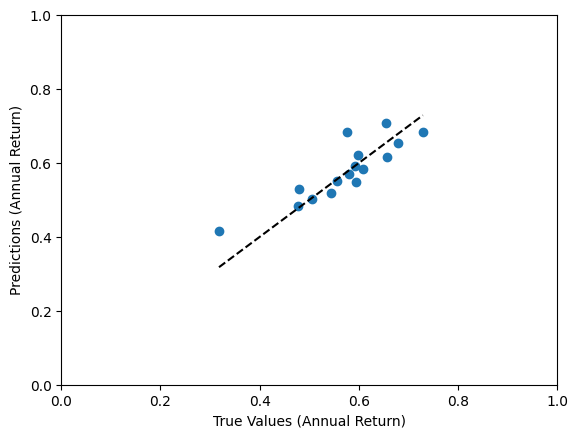

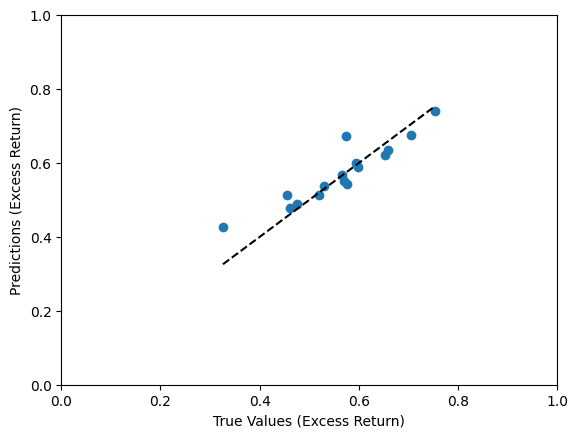

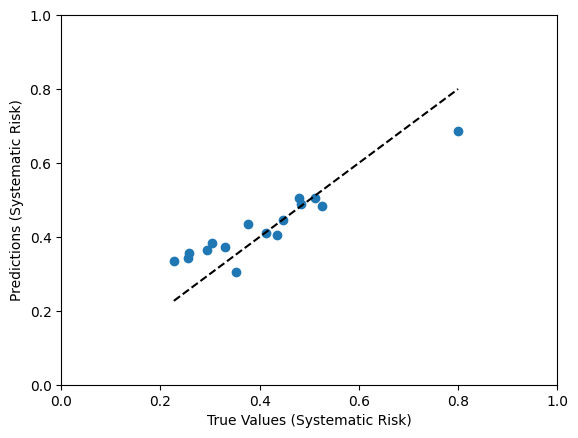

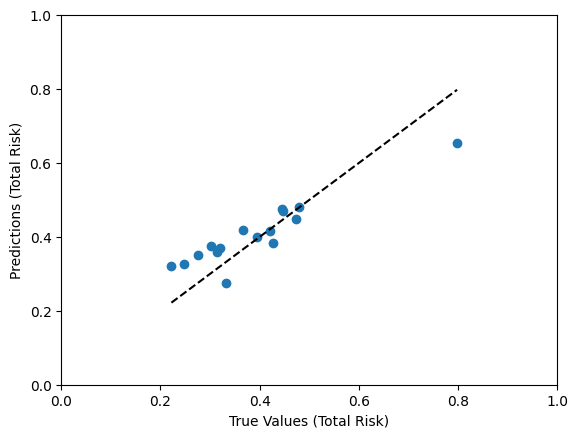

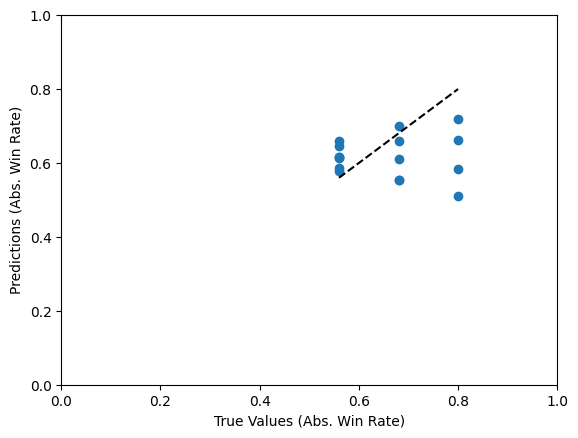

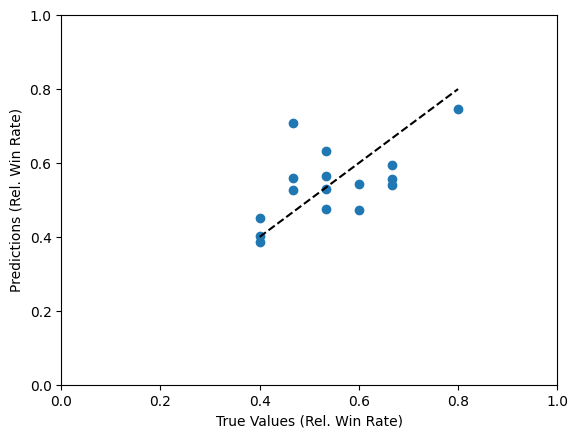

In [20]:
#Individual scatterplots of true vs predicted values each output

for i in range(y_test.shape[1]):
    plt.figure()
    plt.scatter(y_test.iloc[:, i], y_pred[:, i])
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], '--k')
    plt.xlabel(f"True Values ({y.columns[i]})")
    plt.ylabel(f"Predictions ({y.columns[i]})")
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

In [23]:
print("Accuracy of the model: ",model.score(x_test,y_test))

Accuracy of the model:  0.49222637075812753
